In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import scipy.stats
import matplotlib.pyplot as plt

# 1. Estimate Function

In [2]:
def estimate(x, y, x0, h):     
    X = np.append(x, np.ones(m).reshape(m,1), axis=1) #add bias term  
    w = np.mat(np.eye(m)) 
    for i in range(m): 
        xi = X[i] 
        w[i,i] = np.exp(np.dot((xi-x0),(xi-x0).T)/(-2*h*h)) #Gaussian Kernal weights replaces diagonal 1        
    beta = np.linalg.pinv(X.T*(w*X))*(X.T*(w*y))
    x0 = np.array([x0, 1])
    yhat = np.dot(x0, beta) 
    return yhat

def est(h): 
    xhat = np.linspace(0, 1, 30) 
    yhat = [estimate(x, y, x0, h) for x0 in xhat] 
    xhat = np.array(xhat).reshape(m,1) #reshape as 1D vector of length m
    yhat = np.array(yhat).reshape(m,1) #reshape as 1D vector of length m
    errors = y - yhat 
    SSE = np.sum(errors**2)
    return xhat, yhat, SSE

# 2. Generate 30 points and apply estimate function for different h values

In [3]:
np.random.seed(1)
m = 30
x = np.random.uniform(size=(m,1))
epsilon = 0.5 * np.random.normal(size=(m,1))
y = np.array(-(x)**2+2) + epsilon 

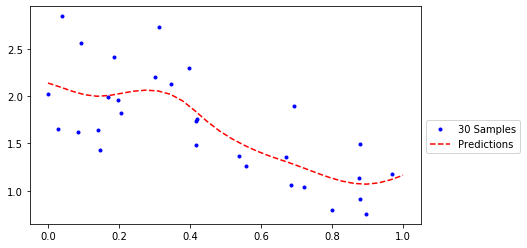


The SSE for h=0.1 is 11.59990754013923


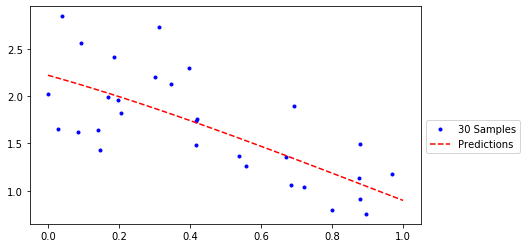


The SSE for h=0.5 is 11.833414096176455


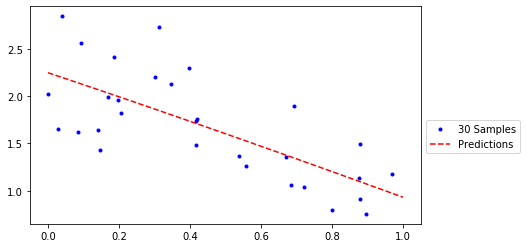


The SSE for h=1 is 11.667405930059305


In [9]:
h=0.1
xhat, yhat, SSE = est(h)
plt.figure(figsize=(7,4))
plt.plot(x, y, 'b.', label='30 Samples')
plt.plot(xhat, yhat, 'r--', label='Predictions') 
plt.legend(loc='upper left',bbox_to_anchor=(1, 0.5))
plt.show() 
print('\nThe SSE for h=0.1 is {}'.format(SSE))

h=0.5
xhat, yhat, SSE = est(h)
plt.figure(figsize=(7,4))
plt.plot(x, y, 'b.', label='30 Samples')
plt.plot(xhat, yhat, 'r--', label='Predictions') 
plt.legend(loc='upper left',bbox_to_anchor=(1, 0.5))
plt.show() 
print('\nThe SSE for h=0.5 is {}'.format(SSE))

h=1
xhat, yhat, SSE = est(h)
plt.figure(figsize=(7,4))
plt.plot(x, y, 'b.', label='30 Samples')
plt.plot(xhat, yhat, 'r--', label='Predictions') 
plt.legend(loc='upper left',bbox_to_anchor=(1, 0.5))
plt.show() 
print('\nThe SSE for h=1 is {}'.format(SSE))


# 3. Tune h using LOOCV

Best h = 0.2

Lowest SSE = 11.448901545308615


<function matplotlib.pyplot.show(*args, **kw)>

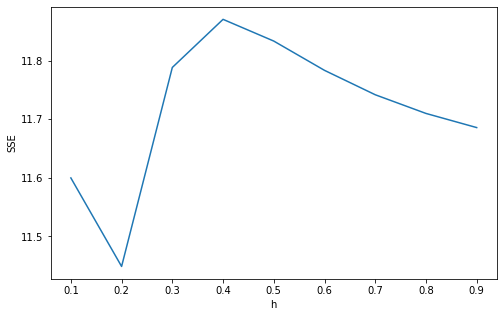

In [13]:
SSE_list = []
hlist = np.arange(0.1,1,0.1)
pre_residual = np.inf

for h in hlist:
    _, _,SSE = est(h)
    SSE_list.append(SSE)
    
    if SSE < pre_residual:
        pre_residual = SSE
        best_h = h 

_,_,SSE = est(best_h)

print('Best h = {}'.format(best_h))
print('\nLowest SSE = {}'.format(min(SSE_list)))

plt.figure(figsize=(8,5))
plt.plot(hlist, SSE_list)  
plt.xlabel('h')
plt.ylabel('SSE')
plt.show